In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence

# from keras.utils import to_categorical
from keras.utils.np_utils import to_categorical


from keras.callbacks import EarlyStopping
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
%matplotlib inline
import os
import re
print(os.listdir("./archive"))

['test.csv', 'dev.csv', 'train.csv', 'dataset.csv']


In [2]:
df = pd.read_csv('archive/dataset.csv')
df.head()

,text,humor
0,"Joe biden rules out 2020 bid: 'guys, i'm not r...",False
1,Watch: darvish gave hitter whiplash with slow ...,False
2,What do you call a turtle without its shell? d...,True
3,5 reasons the 2016 election feels so personal,False
4,"Pasco police shot mexican migrant from behind,...",False


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Sarcasm vs Non-sarcasm')

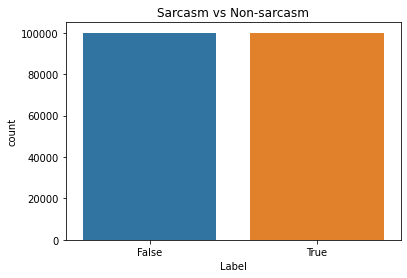

In [3]:
sns.countplot(df.humor)
plt.xlabel('Label')
plt.title('Sarcasm vs Non-sarcasm')

In [4]:
df['text'] = df['text'].apply(lambda x: x.lower())
df['text'] = df['text'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))

In [5]:
print(df.head())

                                                text  humor
0   joe biden rules out 2020 bid guys im not running  False
1  watch darvish gave hitter whiplash with slow p...  False
2   what do you call a turtle without its shell dead   True
3      5 reasons the 2016 election feels so personal  False
4  pasco police shot mexican migrant from behind ...  False


In [6]:
for idx,row in df.iterrows():
    row[0] = row[0].replace('rt',' ')
    
# max_fatures = 2000
max_fatures = 10000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(df['text'].values)
X = tokenizer.texts_to_sequences(df['text'].values)
X = pad_sequences(X)

In [7]:
print(X)
# print(X.shape)

[[   0    0    0 ...   57   46  541]
 [   0    0    0 ...   16 1263 3408]
 [   0    0    0 ...   35 2395  193]
 ...
 [   0    0    0 ...   50  116   97]
 [   0    0    0 ...   13 4551  245]
 [   0    0    0 ...   27  204 1122]]


In [8]:
Y = pd.get_dummies(df['humor']).values
# X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 42)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(150000, 22) (150000, 2)
(50000, 22) (50000, 2)


In [9]:
# embed_dim = 128
# lstm_out = 196
embed_dim = 10
lstm_out = 64

model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
# model.add(SpatialDropout1D(0.4))
# model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(LSTM(lstm_out))
model.add(Dense(2,activation='softmax'))
# model.add(Dense(2,activation='sigmoid'))
# model.add(Dense(2,activation='tanh'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])

In [12]:
# from IPython.display import SVG
# from keras.utils.vis_utils import model_to_dot

# SVG(model_to_dot(model).create(prog='dot', format='svg'))
# SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))


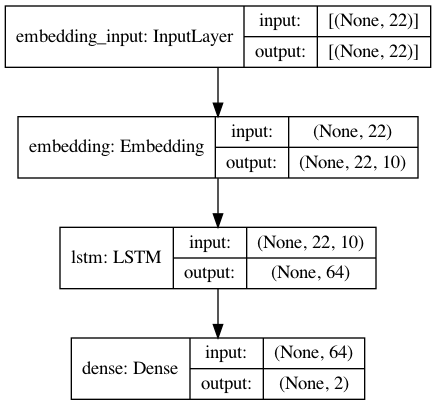

In [10]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [11]:
batch_size = 32
history = model.fit(X_train, Y_train, epochs = 5, batch_size=batch_size, verbose = 2)

Epoch 1/5
4688/4688 - 49s - loss: 0.1830 - accuracy: 0.9269
Epoch 2/5
4688/4688 - 30s - loss: 0.1250 - accuracy: 0.9522
Epoch 3/5
4688/4688 - 30s - loss: 0.1061 - accuracy: 0.9594
Epoch 4/5
4688/4688 - 33s - loss: 0.0898 - accuracy: 0.9652
Epoch 5/5
4688/4688 - 32s - loss: 0.0760 - accuracy: 0.9708


In [12]:
validation_size = 1500

X_validate = X_test[-validation_size:]
Y_validate = Y_test[-validation_size:]
X_test = X_test[:-validation_size]
Y_test = Y_test[:-validation_size]
score,accuracy = model.evaluate(X_test, Y_test, verbose = 2, batch_size = batch_size)

# scoreTrain,accuracyTrain = model.evaluate(X_train, Y_train, verbose = 2, batch_size = batch_size)
# print("score: %.2f" % (score))
# print("acc: %.2f" % (accuracy))
print("Loss score: %.4f" % (score))
print("Accuracy: %.4f" % (accuracy))

# print("Loss score of Train set: %.4f" % (score))
# print("Accuracy of Train set: %.4f" % (accuracy))

# 1969 - 9s - loss: 0.2360 - accuracy: 0.9371
# score: 0.24
# acc: 0.94

# for softmax
# score: 0.15
# acc: 0.95
# score: 0.1537
# acc: 0.9465

# for sigmoid
# score: 0.16
# acc: 0.95
# score: 0.1580
# acc: 0.9453

# for tanh

#two decimal
# score: 0.28
# acc: 0.07

#four decimal
# score: 0.2801
# acc: 0.0671


# FINAL CONSIDERATION
# Loss score: 0.1560
# Accuracy: 0.9462

1516/1516 - 4s - loss: 0.1513 - accuracy: 0.9449
Loss score: 0.1513
Accuracy: 0.9449


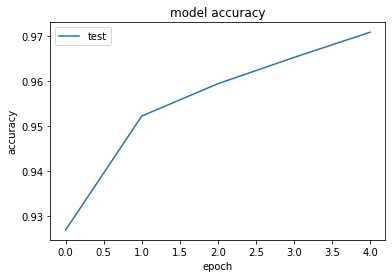

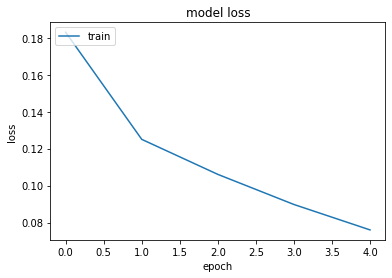

<Figure size 432x288 with 0 Axes>

In [13]:
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['test'], loc='upper left')
plt.savefig('model_accuracy.png')
plt.show()


# summarize history for loss
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('model_loss.png')





In [14]:
pos_cnt, neg_cnt, pos_correct, neg_correct = 0, 0, 0, 0
for x in range(len(X_validate)):
    
    result = model.predict(X_validate[x].reshape(1,X_test.shape[1]),batch_size=1,verbose = 2)[0]
   
    if np.argmax(result) == np.argmax(Y_validate[x]):
        if np.argmax(Y_validate[x]) == 0:
            neg_correct += 1
        else:
            pos_correct += 1
       
    if np.argmax(Y_validate[x]) == 0:
        neg_cnt += 1
    else:
        pos_cnt += 1



# print("Sarcasm_acc", pos_correct/pos_cnt*100, "%")
# print("Non-Sarcasm_acc", neg_correct/neg_cnt*100, "%")

# Sarcasm_acc 91.44827586206897 %
# Non-Sarcasm_acc 95.35483870967741 %

1/1 - 1s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1

1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1

In [18]:
print("Sarcasm_acc", pos_correct/pos_cnt*100, "%")
print("Non-Sarcasm_acc", neg_correct/neg_cnt*100, "%")

# Sarcasm_acc 93.95465994962217 %
# Non-Sarcasm_acc 94.05099150141642 %

Sarcasm_acc 93.70277078085643 %
Non-Sarcasm_acc 94.61756373937678 %


In [19]:
import pickle 
f1 = open('sarcasm_model.pickle','wb')
pickle.dump('sarcasm_model',f1)
f1.close()

In [20]:
# text = ['I like you. You remind me of when I was young and stupid.']
# text = ['Facebook is telling me to ’reconnect’ with my brother...hmmm, I see him everyday :D']
# text = ['Honesty is the best policy']
# text = ["Empty mind is devil's workshop"]
# text = ['You are a good boy']
# text = ['hahaha nice joke']
# text = ["What's the difference between ignorance and apathy? A. I don’t know and I don’t care."]
# text = ["The world tongue-twister champion just got arrested. I hear they're gonna give him a really tough sentence."]
text = ["If we shouldn’t eat at night, why do they put a light in the fridge?"]
# text = ["I am absolutely zero before the supreme"]
# text = ["I asked God for a bike, but I know God doesn’t work that way. So I stole a bike and asked for forgiveness."]
# text = ["Good girls are found on every corner of the earth, but unfortunately the earth is round"]
# text = ["You are Genius"]
# text = ["Coffee spelled backwards is eeffoc which is as meaningless as you are"]
# print(type(text))
text = tokenizer.texts_to_sequences(text)
text = pad_sequences(text, maxlen=29, dtype='int32', value=0)
# print(type(text))
sentiment = model.predict(text,batch_size=1,verbose = 2)[0]
print(sentiment*100)
# print(type(sentiment))
if(np.argmax(sentiment) == 0):
#     print("Non-sarcastic")
    print("Non-Humorous")
elif (np.argmax(sentiment) == 1):
#     print("Sarcasm")
    print("Humorous")

1/1 - 0s
[ 0.27099597 99.729004  ]
Humorous


In [21]:
print(np.argmax(sentiment))

1


In [22]:
#Save the model
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
# model.save_weights("model.h5")

model.save("model.h5")

In [28]:
pip install jupyterthemes

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [34]:
!jt -r

Reset css and font defaults in:
/Users/sarju/.jupyter/custom &
/Users/sarju/Library/Jupyter/nbextensions


In [42]:
text = ["Honesty is the best policy"]
text = tokenizer.texts_to_sequences(text)
text = pad_sequences(text, maxlen=29, dtype='int32', value=0)
sentiment = model.predict(text,batch_size=1,verbose = 2)[0]
print(sentiment*100)
if(np.argmax(sentiment) == 0):
    print("Non-Humorous")
elif (np.argmax(sentiment) == 1):
    print("Humorous")
print(np.argmax(sentiment))

1/1 - 0s
[79.05673 20.94327]
Non-Humorous
0
